In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.  #LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#import data matrix
fpath = '../saved_data/accelerated_ageing/demeaned_data_matrix_accelerated_aging'
df = pd.read_csv(fpath, sep=',', header=0)
df = df.iloc[:-50000, :]

In [4]:
# slice the df into X and y
col_list = df.columns

X = df[col_list[1:]]
y = df[col_list[0]]; y = y+273.15

<AxesSubplot:>

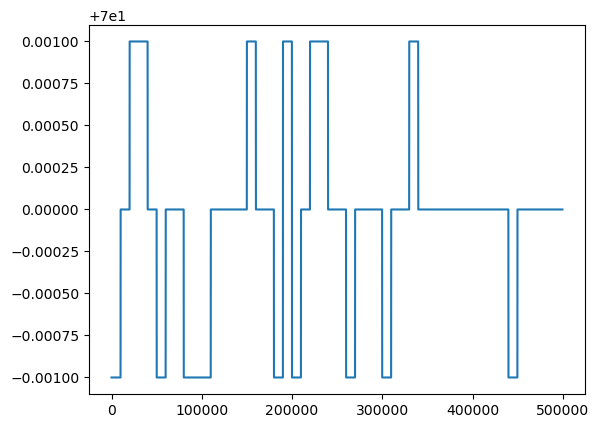

In [5]:
df[col_list[0]].plot()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# specify the number of componenets
n_comps = 10
# # Create a Dask PCA object
lda = LDA(n_components=n_comps, svd_solver='auto')

# Fit the PCA model
lda.fit(X_train) 

In [8]:
# Get explained variance ratio
explained_variance_ratio = lda.explained_variance_ratio_

In [9]:
export_name = '../saved_data/sensor_2_accelereated_ageing_screeplot.png'

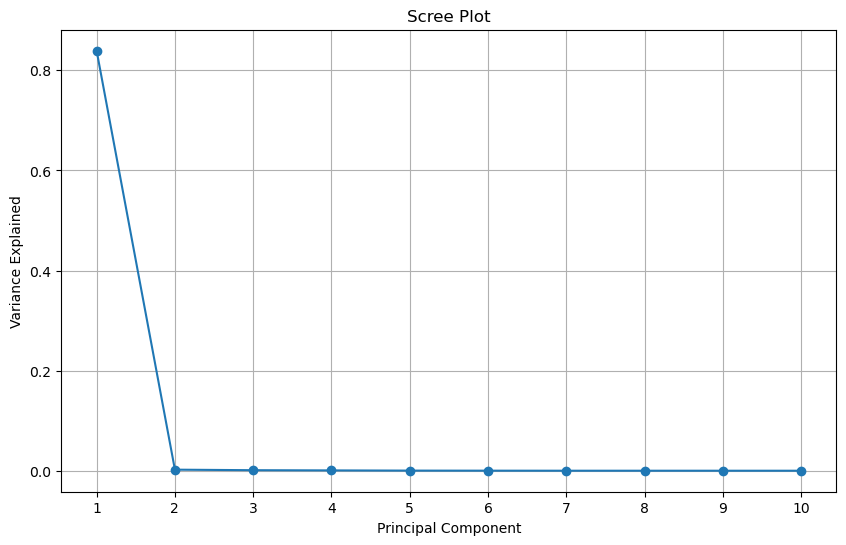

In [10]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
#plt.savefig(export_name, dpi=700)
plt.show()

In [12]:
x_label = X.columns.astype('float')

In [11]:
export_name = '../saved_data/sensor_2_accelerated_ageing_eigenmode_{}.png'

0


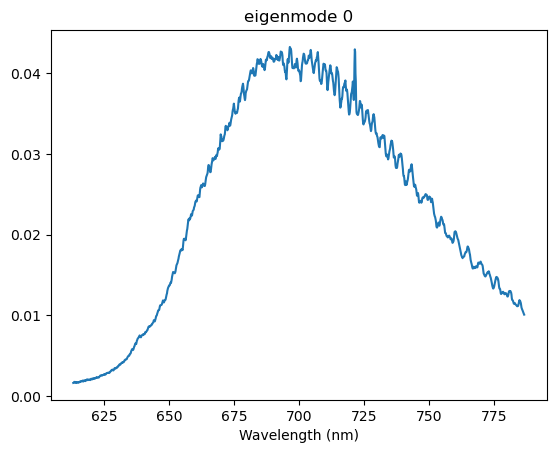

1


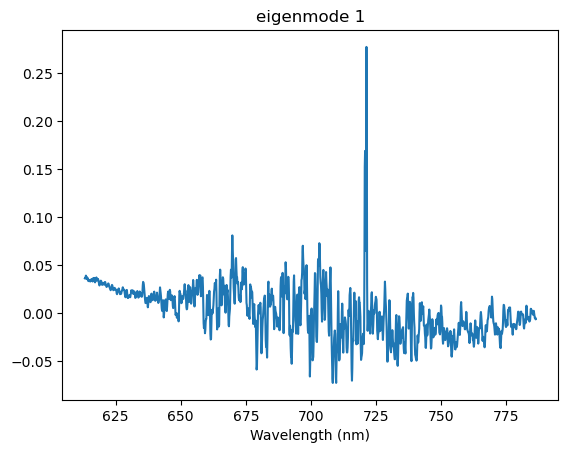

2


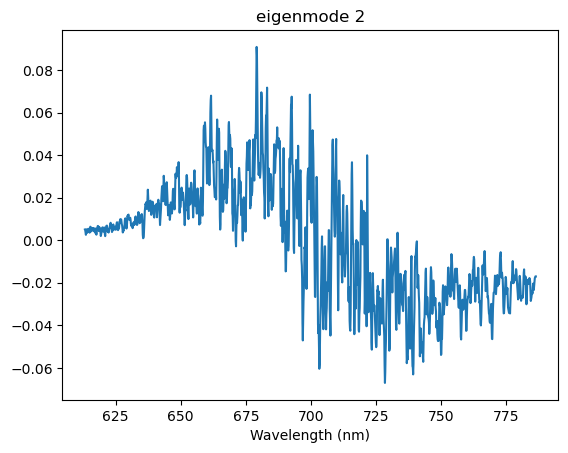

3


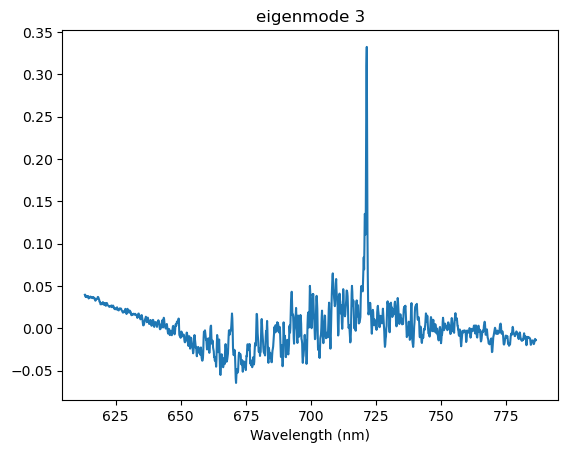

4


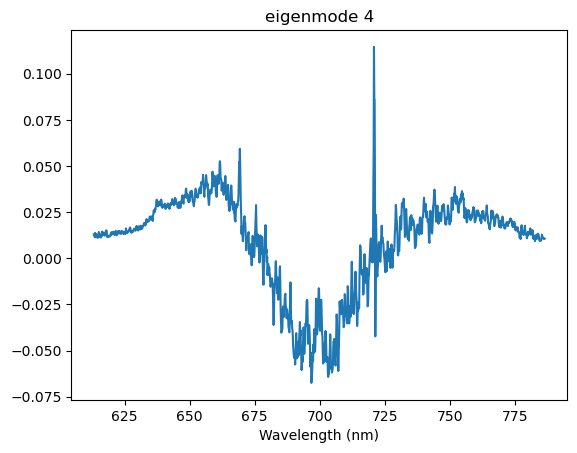

5


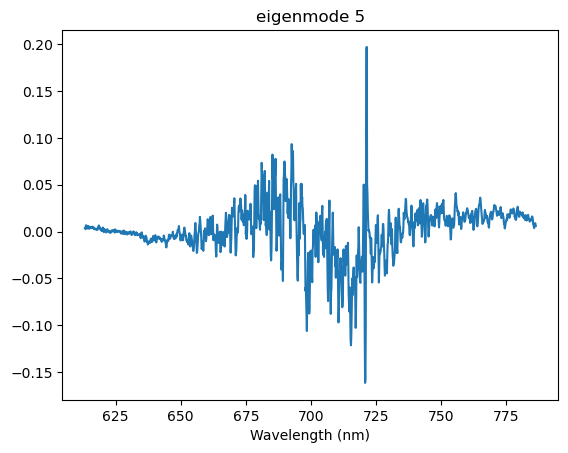

6


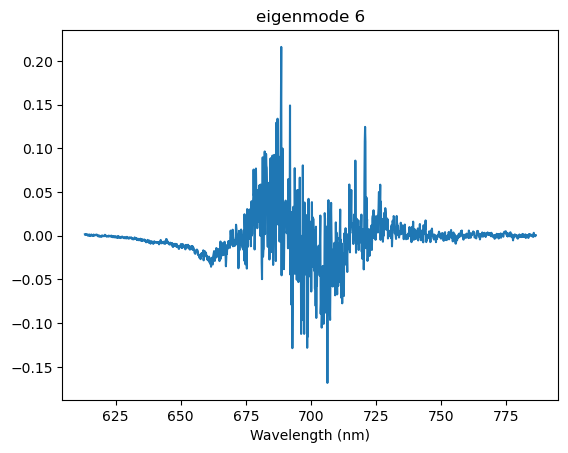

7


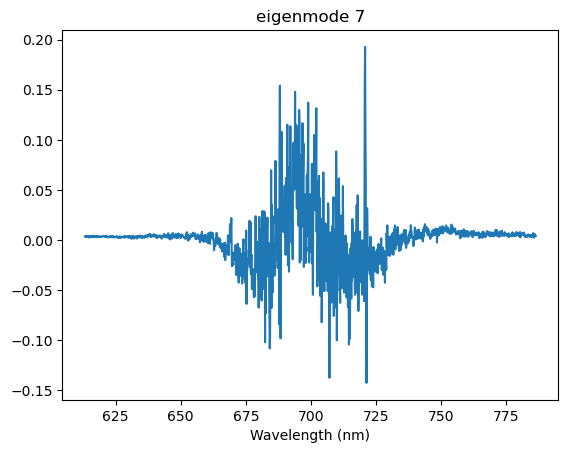

8


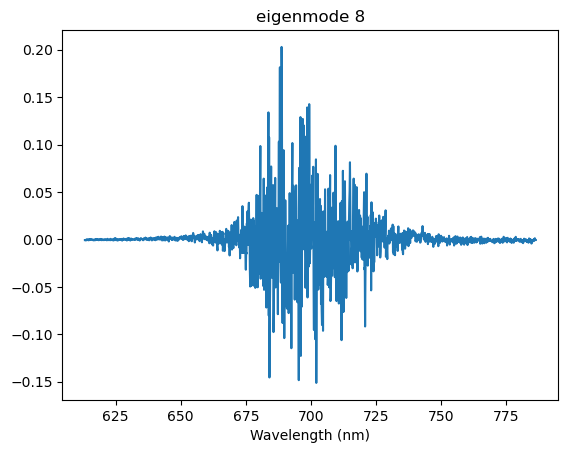

9


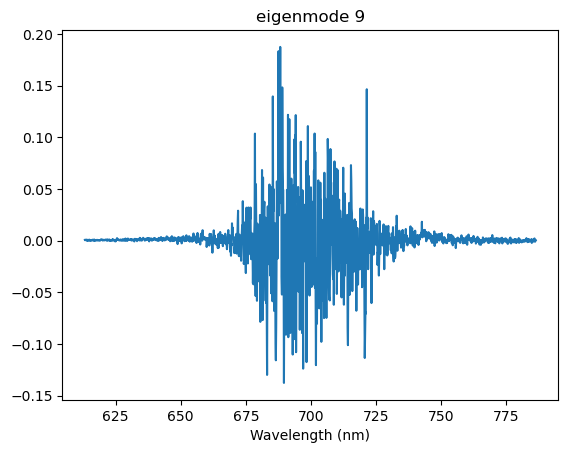

In [13]:
# plot each of the components
for i in range(n_comps):
    print(i)
    plt.plot(x_label.to_numpy(), lda.components_.T[:,i]); 
    plt.title('eigenmode {}'.format(i))
    plt.xlabel('Wavelength (nm)')
    #plt.savefig(export_name.format(i), dpi=700)
    plt.show()


In [14]:
loadings_train = (X_train@pca.components_.T)


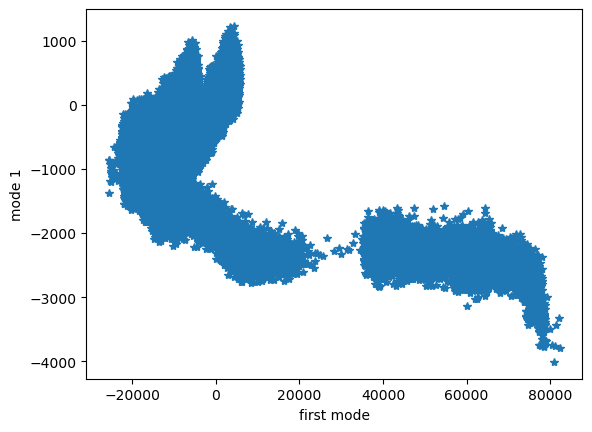

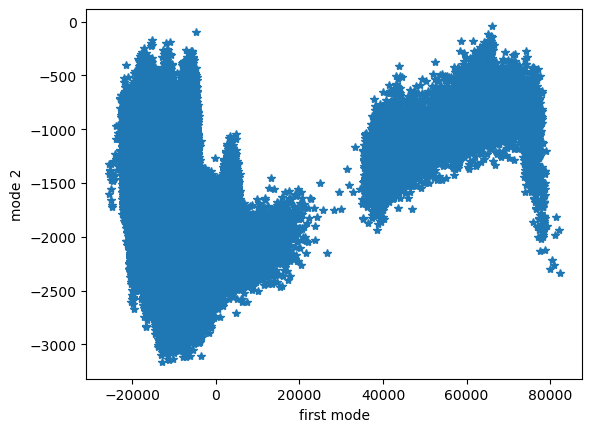

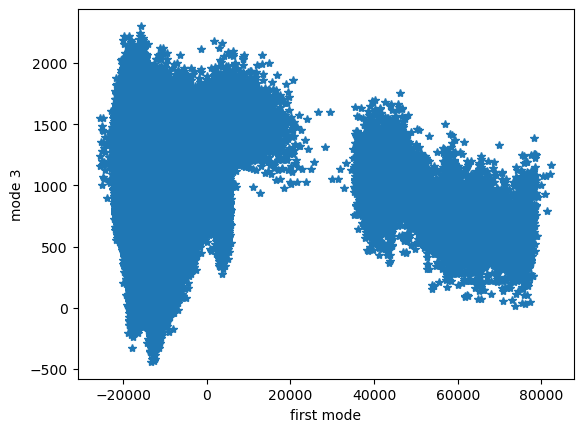

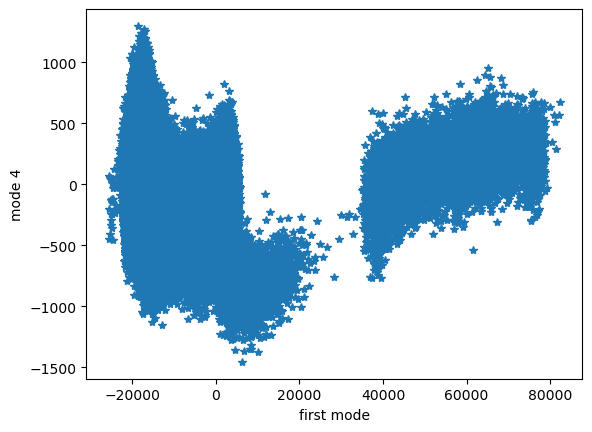

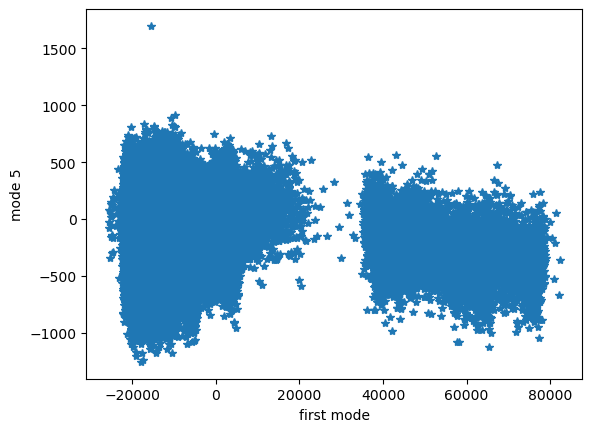

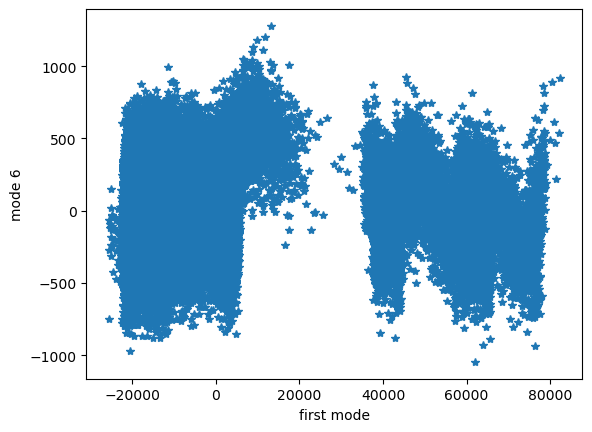

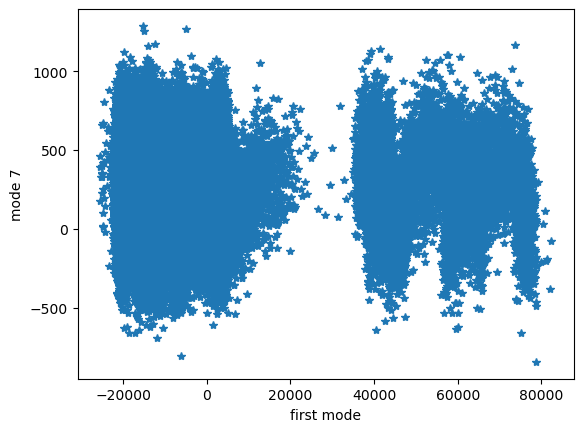

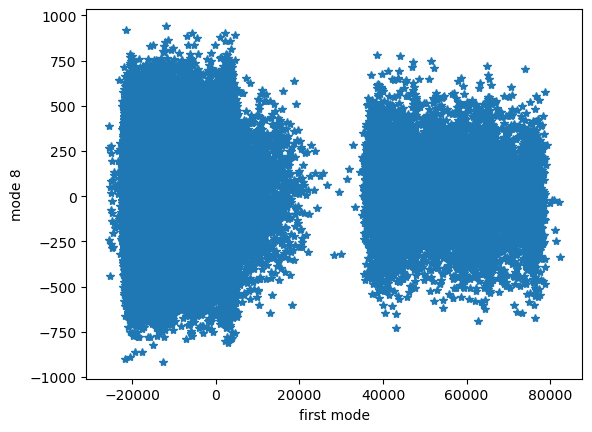

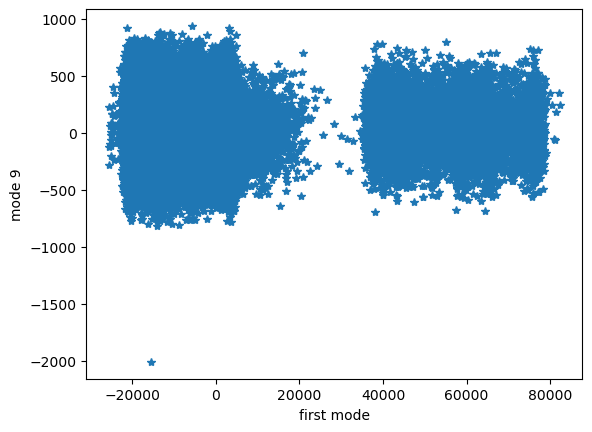

In [15]:
# plot components against each other
loadings_train = loadings_train.values
for i in range(n_comps):
    if i ==0:
        pass
    else:
        plt.plot(loadings_train[:, 0],loadings_train[:, i], '*' )
        plt.xlabel('first mode')
        plt.ylabel('mode {}'.format(i))
        #plt.savefig('../saved_data/sensor_2_week_1_eigenmode_{}_against_first_mode.png'.format(i))
        plt.show()


In [16]:
pca_export = '../saved_data/sensor_2_accelerated_aging_pca_modes.csv'

df_pca = pd.DataFrame(pca.components_)

df_pca.to_csv(pca_export)